In [34]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")
from train_utils import compute_metrics

In [29]:
# compute dcdi oracle scores

def shd(B_true, B_pred_dcdi, threshold):
    B_pred_thresh = (B_pred_dcdi > threshold).astype(int)
    B_true = B_true.astype(int)

    diff = B_true != B_pred_thresh
    score = diff.sum()
    shd = score - ((((diff + diff.transpose()) == 0) & (diff != 0)).sum() / 2)
    return shd


d20_oracle_records = []
d20_oracle_thresholds = []
for seed in [0]:
    B_pred_dcdi = np.load(f"../saved_mtxs/B_pred_50_20_0_1.{seed}_dcdi.npy")
    B_true = np.load(f"../saved_mtxs/B_pred_50_20_0_1.{seed}_gt.npy")

    f = lambda t: shd(B_true, B_pred_dcdi, t)
    bounds = (0, np.max(B_pred_dcdi))
    res = optimize.minimize(f, x0=0.5, bounds=[bounds], method="L-BFGS-B")
    print(f"seed={seed}: shd={res.fun:.3f}, x={res.x[0]}")
    metrics_dict = compute_metrics(B_true, (B_pred_dcdi > res.x[0]).astype(int))
    d20_oracle_records.append(
        ("DCDI-Oracle", metrics_dict["shd"], metrics_dict["recall"], metrics_dict["precision"], metrics_dict["n_edges_pred"], 0)
    )
    d20_oracle_thresholds.append(res.x[0])


In [3]:
# d=20 results
d20_records = [
    ("SDCDI", 42, .93, .7266, 128, 40),
    ("SDCDI", 56, .97, .6467, 150, 40),
    ("SDCDI", 50, .94, .6812, 138, 40),
    ("DCDI", 83, 0.2, 0.8696, 23, 1906), 
    ("DCDI", 75, 0.25, 1, 25, 1960),
    ("DCDI", 75, 0.28, 0.9032, 31, 1935),
    ("DCDFG", 152, .47, .3219, 146, 848),
    ("DCDFG", 114, .45, .4327, 104, 875),
    ("DCDFG", 145, .45, .3333, 135, 900),
]
d20_df = pd.DataFrame.from_records(d20_records, columns=["method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
d20_df

,method,shd,recall,precision,n_edges_pred,runtime
0,SDCDI,42,0.93,0.7266,128,40
1,SDCDI,56,0.97,0.6467,150,40
2,SDCDI,50,0.94,0.6812,138,40
3,DCDI,83,0.20,0.8696,23,1906
4,DCDI,75,0.25,1.0000,25,1960
5,DCDI,75,0.28,0.9032,31,1935
6,DCDFG,152,0.47,0.3219,146,848
7,DCDFG,114,0.45,0.4327,104,875
8,DCDFG,145,0.45,0.3333,135,900


/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='shd'>

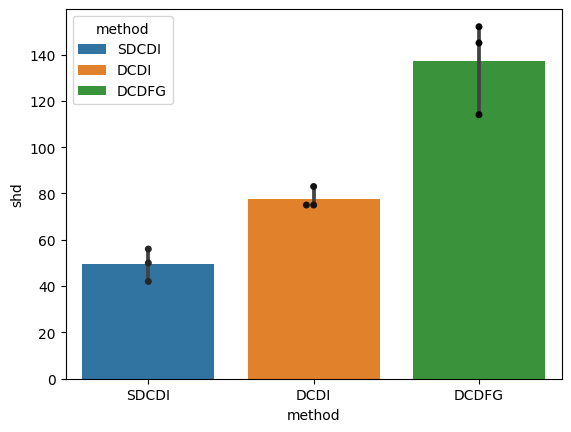

In [15]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="shd", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="shd", hue="method", legend=False, color="black", dodge=False, ax=ax)


/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='recall'>

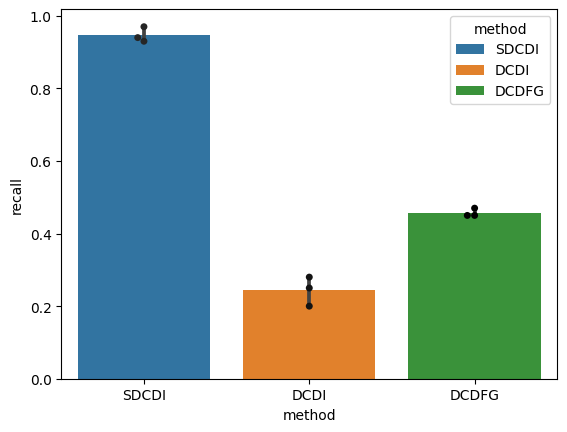

In [16]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="recall", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="recall", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='precision'>

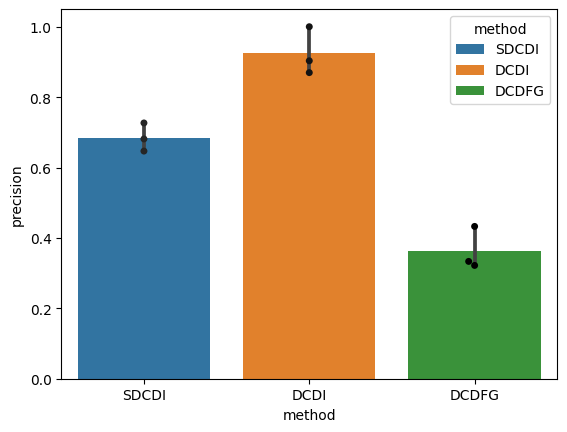

In [17]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="precision", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="precision", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='method', ylabel='n_edges_pred'>

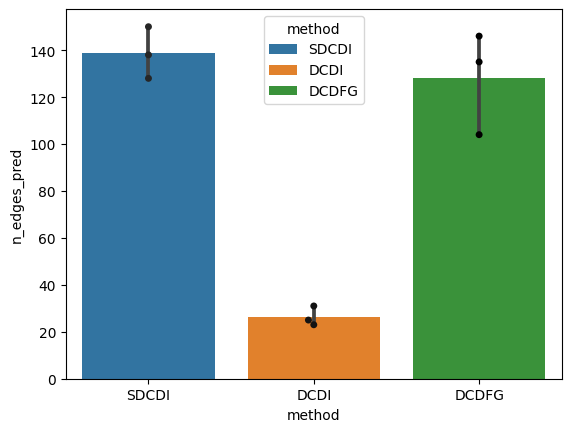

In [18]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="n_edges_pred", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="n_edges_pred", hue="method", legend=False, color="black", dodge=False, ax=ax)

/opt/homebrew/Caskroom/miniforge/base/envs/causalperturb/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


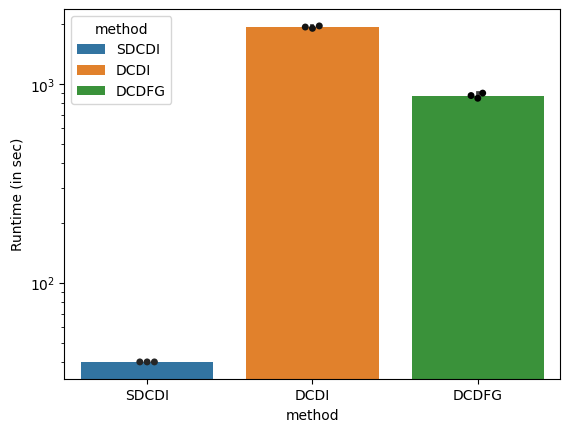

In [21]:
fig, ax = plt.subplots()
ax = sns.barplot(d20_df, x="method", y="runtime", hue="method", dodge=False)
sns.swarmplot(d20_df, x="method", y="runtime", hue="method", legend=False, color="black", dodge=False, ax=ax)
ax.set_ylabel("Runtime (in sec)")
ax.set_yscale("log")
ax.set_yticklabels()

In [22]:
# d=50
d50_records = [
    ("SDCDI", 158, .852, .6377, 334, 123),
    ("SDCDI", 136, .928, .6629, 350, 116),
    ("SDCDI", 161, .936, .6174, 379, 112),
    ("DCDFG", 852, .48, .1425, 842, 1097),
    ("DCDFG", 879, .372, .1141, 815, 1017),
    ("DCDFG", 896, .388, .1155, 840, 942),
]
d50_df = pd.DataFrame.from_records(d50_records, columns=["method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
print(d50_df.head())

# d=100
d100_records = [
    ("SDCDI", 132, .944, .8194, 576, 319),
    ("SDCDI", 156, .938, .7896, 594, 320),
    ("SDCDI", 151, .906, .8133, 557, 318),
    ("DCDFG", 852, .48, .1425, 842, 1097), # fix these
    ("DCDFG", 879, .372, .1141, 815, 1017),
    ("DCDFG", 896, .388, .1155, 840, 942),
]
d100_df = pd.DataFrame.from_records(d100_records, columns=["method", "shd", "recall", "precision", "n_edges_pred", "runtime"])
print(d100_df.head())

  method  shd  recall  precision  n_edges_pred  runtime
0  SDCDI  158   0.852     0.6377           334      123
1  SDCDI  136   0.928     0.6629           350      116
2  SDCDI  161   0.936     0.6174           379      112
3  DCDFG  852   0.480     0.1425           842     1097
4  DCDFG  879   0.372     0.1141           815     1017
  method  shd  recall  precision  n_edges_pred  runtime
0  SDCDI  132   0.944     0.8194           576      319
1  SDCDI  156   0.938     0.7896           594      320
2  SDCDI  151   0.906     0.8133           557      318
3  DCDFG  852   0.480     0.1425           842     1097
4  DCDFG  879   0.372     0.1141           815     1017


In [23]:
d200_sdcdi_runtime = 1079

In [ ]:
# runtime plot for sdcdi


In [ ]:
# d=10 intermediate plots to annotate shd plot with

In [ ]:
# sdcdi & dcdfg sparsity exp